In [716]:
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
from sklearn.model_selection import GridSearchCV,  validation_curve

figure(figsize=(18, 12), dpi=600)

<Figure size 10800x7200 with 0 Axes>

<Figure size 10800x7200 with 0 Axes>

In [1065]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import pearsonr, spearmanr

from sklearn import svm
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
tf.__version__


import os
np.random.seed(42)
tf.random.set_seed(42)
os.environ['PYTHONHASHSEED']=str(42)


In [754]:
# Load the dataframe that was saved in read_files.py

def read_dataframe():
    default = False

    if default:
        df = pd.read_csv("tmp/df.csv", index_col=0)
        labels = ['mean Cd 200', 'mean Cd 400', 'mean Cd 600']
        q = df["mean Cd 200"].quantile(0.999)

    else:
        df = pd.read_csv("tmp/training_data.csv",  sep="\t")
        labels = ['cd', 'cl']

        df = df[(df["cd"] < 1) & (df["cd"]>-0.5)]
    return df



In [719]:
df.describe()

,u,angle,cd,cl
count,1189.000000,1189.000000,1189.000000,1189.000000
mean,50.510934,7.429773,0.029741,0.637121
std,5.660414,4.464826,0.051227,0.377540
min,41.000000,0.000000,-0.218691,-0.432934
25%,45.500000,3.500000,0.009391,0.310711
50%,50.500000,7.500000,0.012202,0.662303
75%,55.500000,11.500000,0.024222,0.963150
max,60.000000,15.000000,0.704503,2.927380


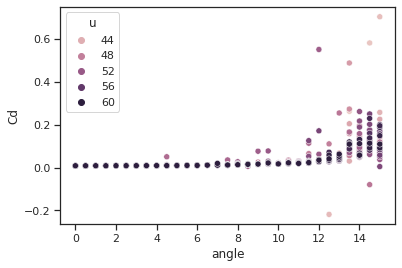

In [721]:
sns.color_palette("pastel")

# Exploration for outliers
sns.scatterplot(data=df,  x="angle", y= "cd", hue="u")
plt.ylabel("Cd")
#df.plot.scatter("angle","cl")
#df.plot.scatter("angle","cd")
plt.savefig("cd_vs_angle.png")



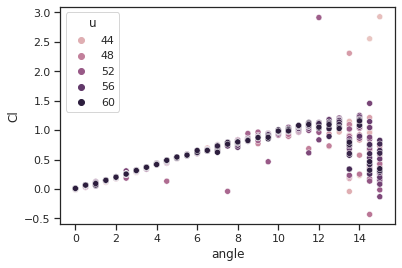

In [722]:
sns.scatterplot(data=df,  x="angle", y= "cl", hue="u")
plt.ylabel("Cl")
plt.savefig("cl_vs_angle.png")


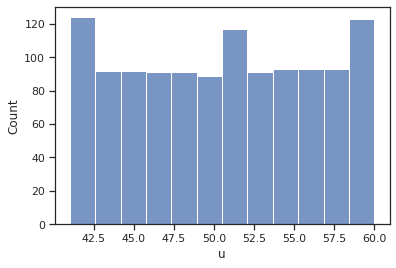

In [723]:
sns.histplot(data=df, x="u")
plt.savefig("u_hist.png")

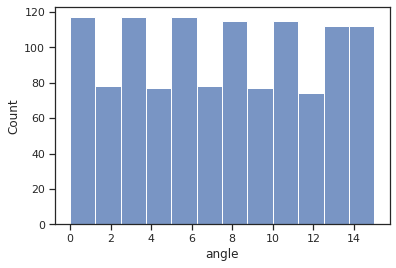

In [724]:
sns.histplot(data=df, x="angle")
plt.savefig("angle_hist.png")

In [725]:
df.describe()

,u,angle,cd,cl
count,1189.000000,1189.000000,1189.000000,1189.000000
mean,50.510934,7.429773,0.029741,0.637121
std,5.660414,4.464826,0.051227,0.377540
min,41.000000,0.000000,-0.218691,-0.432934
25%,45.500000,3.500000,0.009391,0.310711
50%,50.500000,7.500000,0.012202,0.662303
75%,55.500000,11.500000,0.024222,0.963150
max,60.000000,15.000000,0.704503,2.927380


<AxesSubplot:xlabel='cl', ylabel='cd'>

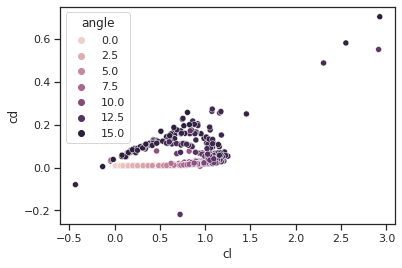

In [726]:
sns.scatterplot(data=df,  x="cl", y= "cd", hue="angle")


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='angle', ylabel='cl'>

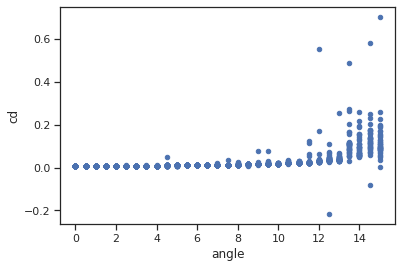

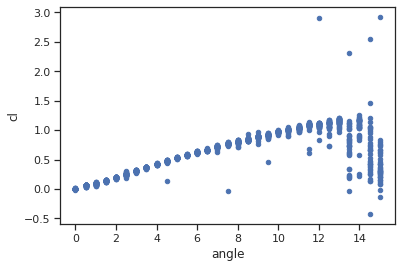

In [727]:
df.plot.scatter("angle","cd")
df.plot.scatter("angle","cl")

In [728]:
train, test = train_test_split(df, test_size=0.2)
train_features = train.copy()
test_features = test.copy()

In [729]:
# Remove the "mean Cd" column from the features and use it as label
train_labels = pd.concat([train_features.pop(x) for x in labels ], axis=1)
#train_labels = train_features.pop('mean Cd')
test_labels = pd.concat([test_features.pop(x) for x in labels], axis=1)
train.shape, test.shape

((951, 4), (238, 4))

                 u        angle           cd           cl
count  1189.000000  1189.000000  1189.000000  1189.000000
mean     50.510934     7.429773     0.029741     0.637121
std       5.660414     4.464826     0.051227     0.377540
min      41.000000     0.000000    -0.218691    -0.432934
25%      45.500000     3.500000     0.009391     0.310711
50%      50.500000     7.500000     0.012202     0.662303
75%      55.500000    11.500000     0.024222     0.963150
max      60.000000    15.000000     0.704503     2.927380


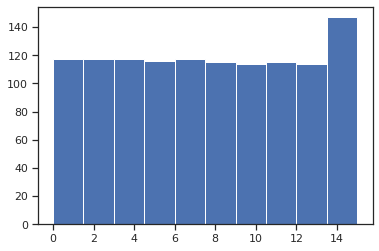

In [781]:
df = read_dataframe()
print(df.describe())
ss = MinMaxScaler()
#plt.hist(df["u"])
#plt.show()
plt.hist(df["angle"])

df[["u"]] = ss.fit_transform(df[["u"]])
df[["angle"]] = ss.fit_transform(df[["angle"]])

,u,angle,cd,cl
count,1189.000000,1189.000000,1189.000000,1189.000000
mean,0.500575,0.495318,0.029741,0.637121
std,0.297917,0.297655,0.051227,0.377540
min,0.000000,0.000000,-0.218691,-0.432934
25%,0.236842,0.233333,0.009391,0.310711
50%,0.500000,0.500000,0.012202,0.662303
75%,0.763158,0.766667,0.024222,0.963150
max,1.000000,1.000000,0.704503,2.927380


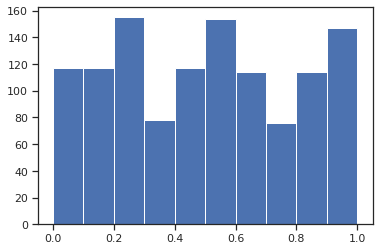

In [782]:
#plt.hist(df["u"])
plt.show()
plt.hist(df["angle"])

df.describe()

In [1013]:
# Manual Scaler
for features in [train_features, test_features]:
    for column in ["u", "angle"]:
        features[column] /= features[column].max() 

print(train_features.describe())
print(test_features.describe())

                u       angle
count  951.000000  951.000000
mean     0.842560    0.490641
std      0.094945    0.297942
min      0.683333    0.000000
25%      0.758333    0.233333
50%      0.841667    0.500000
75%      0.925000    0.733333
max      1.000000    1.000000
                u       angle
count  238.000000  238.000000
mean     0.839006    0.514006
std      0.092025    0.296392
min      0.683333    0.000000
25%      0.758333    0.266667
50%      0.837500    0.500000
75%      0.922917    0.800000
max      1.000000    1.000000


In [1086]:
n_layers = 8
n_nodes = 16

In [1149]:
all_layers = [layers.Dense(n_nodes, activation="tanh", name="hidden_layer_"+str(i)) for i in np.arange(n_layers)]
#all_layers.append(layers.Dense(10, activation="tanh"))
#all_layers.append(layers.Conv2D(16, 4))
#all_layers.append(layers.MaxPooling2D((2,2)))
all_layers.append(layers.Dropout(0.5))
all_layers.append(layers.Dense(1,  name="output_layer"))
model = Sequential(all_layers)


In [1150]:
model.compile(optimizer="Adam", loss='mean_squared_error')


In [1151]:
train_labels

,cd,cl
300,0.021041,1.002209
729,0.013658,0.806600
606,0.014545,0.848058
277,0.073208,1.213195
774,0.050509,0.119926
...,...,...
1063,0.009508,0.474145
1115,0.195322,0.764543
1150,0.008677,0.146709
879,0.010081,0.582886


In [1152]:
history = model.fit(
    train_features, train_labels["cd"],
    epochs=10,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/10
24/24 [==============================] - 1s 7ms/step - loss: 0.0108 - val_loss: 0.0056
Epoch 2/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0056
Epoch 3/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0056
Epoch 4/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0057
Epoch 5/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0056
Epoch 6/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0015 - val_loss: 0.0057
Epoch 7/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0056
Epoch 8/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0056
Epoch 9/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0056
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0055


===============================Test===============================
8/8 [==============================] - 0s 1ms/step - loss: 0.0011


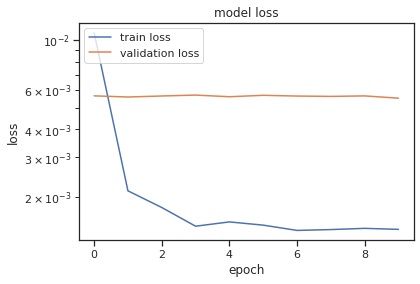

In [1153]:
print("==================================================================")
print("===============================Test===============================")
eval_loss = model.evaluate(test_features,test_labels["cd"])

# Plot history of train and validation loss
plt.figure()
plt.semilogy(history.history['loss'])
plt.semilogy(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.savefig("model_loss_"+str(n_nodes)+"_nodes_"+str(n_layers)+"_layer.png")


In [1131]:
model.save('tmp/model')


INFO:tensorflow:Assets written to: tmp/model/assets


In [1146]:
predicted = model.predict(test_features).ravel()

In [1147]:
predicted

array([0.01290125, 0.08404306, 0.06897196, 0.07264562, 0.05349281,
       0.10490952, 0.01986425, 0.01605417, 0.01748337, 0.06347528,
       0.01285692, 0.01975147, 0.01873666, 0.02397087, 0.09775282,
       0.01753384, 0.09698459, 0.0157115 , 0.01711808, 0.0185076 ,
       0.0457605 , 0.03192754, 0.01933853, 0.0153852 , 0.02583834,
       0.03145436, 0.10673705, 0.01810814, 0.01368089, 0.01329139,
       0.02940634, 0.09583621, 0.01662287, 0.05662319, 0.01519867,
       0.06653612, 0.0500195 , 0.02521745, 0.01423933, 0.08533649,
       0.01865786, 0.08667126, 0.01710981, 0.01796334, 0.07510713,
       0.03011733, 0.07265691, 0.06316159, 0.01008943, 0.014933  ,
       0.01191288, 0.06235496, 0.01552542, 0.01271477, 0.0604846 ,
       0.04089922, 0.0478007 , 0.01718126, 0.06551582, 0.03234312,
       0.01467831, 0.08159877, 0.01531333, 0.01611061, 0.10615933,
       0.04828446, 0.04897069, 0.10281016, 0.03997801, 0.01532414,
       0.01941232, 0.01377555, 0.02071407, 0.02118674, 0.01544

In [1133]:
predicted[:,0].shape, test_labels["cd"].shape

((238,), (238,))

In [1134]:
test_labels

,cd,cl
321,0.010473,0.570157
1177,0.091809,0.308992
926,0.111972,0.682845
86,0.031457,1.075431
955,0.027694,1.178344
...,...,...
612,0.021223,1.118321
839,0.008507,0.111436
225,0.009673,0.424194
1102,0.016015,0.817101


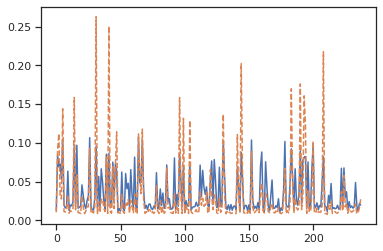

In [1135]:
plt.plot(predicted[:,0])
plt.plot(test_labels["cd"].values, "--")
plt.savefig("cd.png")

In [1136]:
plt.plot(predicted[:,1])
plt.plot(test_labels["cl"].values, "--")
plt.savefig("cl.png")

IndexError: index 1 is out of bounds for axis 1 with size 1

IndexError: index 1 is out of bounds for axis 1 with size 1

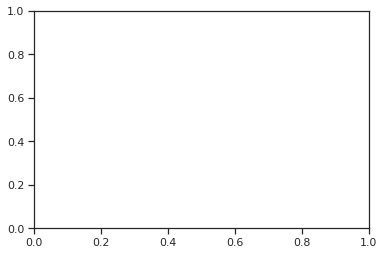

In [1137]:
fig, ax = plt.subplots()

ax.scatter(predicted[:,1], test_labels["cl"].values, c="red" )
ax.set_xlabel("predicted Cl")
ax.set_ylabel("True Cl")
 
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot((0,1.5), (0, 1.5), alpha=0.75, zorder=0)
ax.set_aspect('equal')


In [1138]:
predicted

array([[0.01290125],
       [0.08404306],
       [0.06897196],
       [0.07264562],
       [0.05349281],
       [0.10490952],
       [0.01986425],
       [0.01605417],
       [0.01748337],
       [0.06347528],
       [0.01285692],
       [0.01975147],
       [0.01873666],
       [0.02397087],
       [0.09775282],
       [0.01753384],
       [0.09698459],
       [0.0157115 ],
       [0.01711808],
       [0.0185076 ],
       [0.0457605 ],
       [0.03192754],
       [0.01933853],
       [0.0153852 ],
       [0.02583834],
       [0.03145436],
       [0.10673705],
       [0.01810814],
       [0.01368089],
       [0.01329139],
       [0.02940634],
       [0.09583621],
       [0.01662287],
       [0.05662319],
       [0.01519867],
       [0.06653612],
       [0.0500195 ],
       [0.02521745],
       [0.01423933],
       [0.08533649],
       [0.01865786],
       [0.08667126],
       [0.01710981],
       [0.01796334],
       [0.07510713],
       [0.03011733],
       [0.07265691],
       [0.063

(-0.005068059789704998, 0.275456276117605)

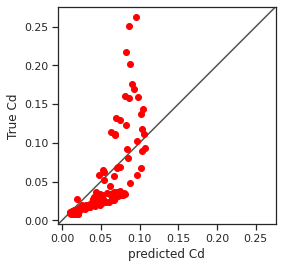

In [1154]:
fig, ax = plt.subplots()

ax.scatter(predicted, test_labels["cd"].values, c="red" )
ax.set_xlabel("predicted Cd")
ax.set_ylabel("True Cd")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
#plt.plot([0, 0.014])

In [1155]:
model.evaluate(test_features, test_labels["cd"])

8/8 [==============================] - 0s 861us/step - loss: 0.0011


0.0011338141048327088

In [1156]:
model.predict(x=[[51.4815, 0]])

array([[0.05309892]], dtype=float32)

In [1157]:
model.predict(x=[[51.4815, 5]])

array([[0.03137659]], dtype=float32)

In [1158]:
model.predict(x=[[51.4815, 10]])

array([[0.02737082]], dtype=float32)

In [1159]:
model.predict(x=[[51.4815, 15]])

array([[0.00399153]], dtype=float32)

In [1160]:
nasa=pd.read_csv("nasa.dat", sep="\s+", names=["angle","cl","cd"])

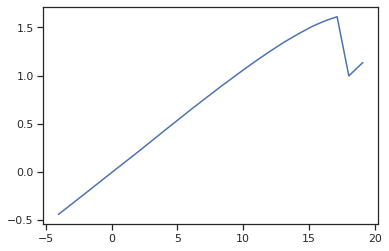

In [1161]:
plt.plot(nasa["angle"], nasa["cl"])

In [1162]:
nasa["u"] = 51.4815
nasa.head()

,angle,cl,cd,u
0,-4.04,-0.4417,0.00871,51.4815
1,-2.14,-0.2385,0.00800,51.4815
2,-0.05,-0.0126,0.00809,51.4815
3,2.05,0.2125,0.00816,51.4815
4,4.04,0.4316,0.00823,51.4815


In [1163]:
nasa_test_features = nasa[["u", "angle"]]

In [1164]:
nasa_predict = model.predict(nasa_test_features)

In [1165]:
nasa_predict.shape

(17, 1)

In [1166]:
nasa.shape

(17, 4)

In [1167]:
plt.scatter(nasa["angle"], nasa_predict[:,1])
plt.scatter(nasa["angle"], nasa["cl"])

IndexError: index 1 is out of bounds for axis 1 with size 1

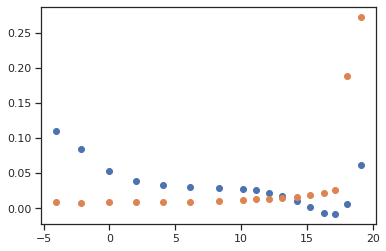

In [1220]:
plt.scatter(nasa["angle"], nasa_predict[:,0])
plt.scatter(nasa["angle"], nasa["cd"])
 

In [1169]:
tips = sns.load_dataset("tips")


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

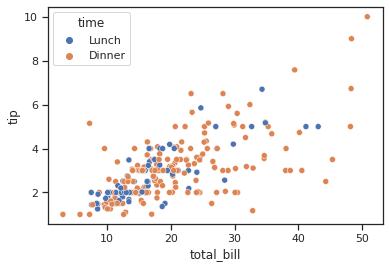

In [1170]:
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="time")


In [1171]:
pearsonr(df.u, df.cl)

(-0.016917159774771425, 0.5600524495403806)

In [1172]:
pearsonr(df.cd, df.angle), pearsonr(df.cl, df.angle)

((0.5288590998079238, 1.1952005957218042e-86),
 (0.7567027861850539, 2.4336089372461764e-221))

In [1173]:
spearmanr(df.u, df.cl), spearmanr(df.angle, df.cl)

(SpearmanrResult(correlation=-0.0060553100775509235, pvalue=0.8347755264160439),
 SpearmanrResult(correlation=0.7847117937380877, pvalue=8.372612677257458e-249))

In [1174]:
spearmanr(df.u, df.cd), spearmanr(df.angle, df.cd)

(SpearmanrResult(correlation=-0.03522951801888536, pvalue=0.2247939055351063),
 SpearmanrResult(correlation=0.9668150771270123, pvalue=0.0))

In [1175]:
parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[0.1, 1, 10, 100, 100]}

In [1176]:
svr = svm.SVR(gamma=1)
clf = GridSearchCV(svr, parameters)

In [1195]:
clf.fit(train_features, train_labels["cd"])

GridSearchCV(estimator=SVR(gamma=1),
             param_grid={'C': [0.1, 1, 10, 100, 100],
                         'kernel': ('linear', 'rbf', 'poly')})

In [1196]:
svm_predict = clf.predict(test_features)

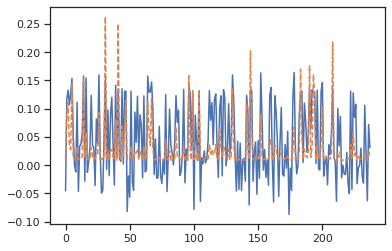

In [1215]:
plt.plot(svm_predict)
plt.plot(test_labels["cd"].values, "--")
plt.savefig("svr_cd.png")

In [1216]:
clf.estimator.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [1217]:
test_features.shape, test_labels.shape

((238, 2), (238, 2))

In [1219]:
clf.score(test_features, test_labels["cd"])

-0.5338087663047544

In [1201]:
result= [test_features, test_labels,]

In [1202]:
result = test_features.join(test_labels)

In [1203]:
svm_df  =pd.DataFrame(svm_predict, columns=["predicted"])

In [1204]:
result = result.reset_index()

In [1205]:
result= result.join(svm_df)

In [1206]:
result.head()

,index,u,angle,cd,cl,predicted
0,321,0.766667,0.366667,0.010473,0.570157,-0.045211
1,1177,0.991667,1.000000,0.091809,0.308992,0.117792
2,926,0.925000,0.900000,0.111972,0.682845,0.132816
3,86,0.700000,0.800000,0.031457,1.075431,0.106795
4,955,0.933333,0.833333,0.027694,1.178344,0.127424


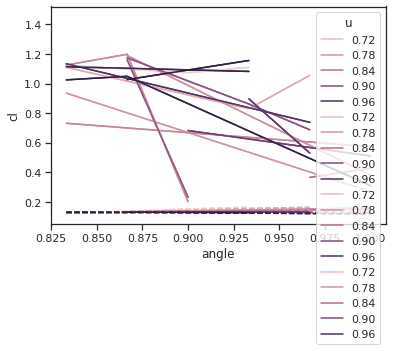

In [1207]:
for u in [50, 52]:
    sns.lineplot(data=result[result.angle>0.8],x="angle",y="cl", hue="u")
    sns.lineplot(data=result[result.angle>0.8],x="angle",y="predicted", hue="u", linestyle="--" )


In [1208]:
clf.estimator.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 1,
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

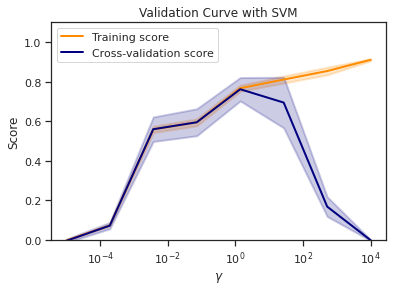

In [1209]:
X = df[["u", "angle"]].values
y = df[["cl"]].values.ravel()
#param_range = np.logspace(0, 3, 8)
param_range = np.logspace(-5, 4, 8)
lw = 2
plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
train_scores, test_scores = validation_curve(
    clf.estimator,X, y, param_name="gamma", param_range=param_range,
    scoring="r2", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

array([[<AxesSubplot:xlabel='u', ylabel='u'>,
        <AxesSubplot:xlabel='angle', ylabel='u'>,
        <AxesSubplot:xlabel='cd', ylabel='u'>,
        <AxesSubplot:xlabel='cl', ylabel='u'>],
       [<AxesSubplot:xlabel='u', ylabel='angle'>,
        <AxesSubplot:xlabel='angle', ylabel='angle'>,
        <AxesSubplot:xlabel='cd', ylabel='angle'>,
        <AxesSubplot:xlabel='cl', ylabel='angle'>],
       [<AxesSubplot:xlabel='u', ylabel='cd'>,
        <AxesSubplot:xlabel='angle', ylabel='cd'>,
        <AxesSubplot:xlabel='cd', ylabel='cd'>,
        <AxesSubplot:xlabel='cl', ylabel='cd'>],
       [<AxesSubplot:xlabel='u', ylabel='cl'>,
        <AxesSubplot:xlabel='angle', ylabel='cl'>,
        <AxesSubplot:xlabel='cd', ylabel='cl'>,
        <AxesSubplot:xlabel='cl', ylabel='cl'>]], dtype=object)

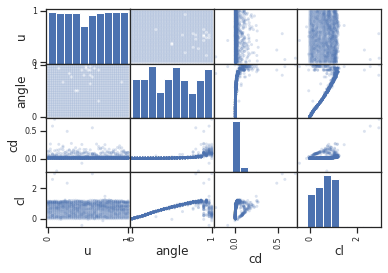

In [1210]:
pd.plotting.scatter_matrix(df, alpha=0.2)

In [1211]:
X_train = np.array([[ 100., 1.,  2.],
                    [ 200.,  0.8, 1],
                    [ 320.,  1., 1.]])
scaler = StandardScaler().fit(X_train)

In [1212]:
X_scaled = scaler.transform(X_train)

(-0.09971570853396397, 0.275456276117605)

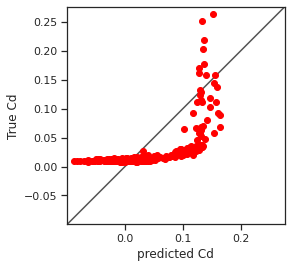

In [1213]:
fig, ax = plt.subplots()

ax.scatter(svm_predict, test_labels["cd"].values, c="red" )
ax.set_xlabel("predicted Cd")
ax.set_ylabel("True Cd")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
#plt.plot([0, 0.014])

In [1194]:
svm_predict

array([0.48325979, 0.43583053, 0.90890115, 1.15164116, 1.05715723,
       0.49217309, 0.72545397, 0.53778329, 0.71237093, 1.11943506,
       0.24374319, 0.7798639 , 0.65965111, 0.90913206, 0.86680063,
       0.71438094, 0.8608082 , 0.40240175, 0.44573651, 0.06751735,
       1.09007086, 0.97657003, 0.11087147, 0.64932903, 0.97135637,
       0.97531659, 0.51062886, 0.12048468, 0.5890394 , 0.30249949,
       0.97056877, 1.01375694, 0.27112705, 1.12533894, 0.40172314,
       1.15775077, 1.092352  , 0.90906965, 0.5884582 , 0.94950034,
       0.19839404, 0.63464316, 0.65144018, 0.33244295, 0.91813757,
       0.92312589, 0.78439812, 0.90588091, 0.36256589, 0.44137915,
       0.24340043, 0.99894261, 0.64877217, 0.2115368 , 1.13681053,
       1.04217501, 1.09070031, 0.07576833, 1.15397698, 1.02188273,
       0.44097398, 1.13526853, 0.48666398, 0.20840085, 0.50418806,
       1.05665453, 1.05643276, 0.47634428, 1.09116339, 0.20993439,
       0.66361373, 0.1330272 , 0.78346808, 0.79414449, 0.24228